In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b91fd6d118b99170a12c5686de74770d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | corinto
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | merauke
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | colesberg
Processing Record 9 of Set 1 | ambanja
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | port augusta
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | barao de melgaco
Processing Record 21 of S

Processing Record 36 of Set 4 | saint george
Processing Record 37 of Set 4 | hunza
City not found. Skipping...
Processing Record 38 of Set 4 | chake chake
Processing Record 39 of Set 4 | beyneu
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | bagdarin
Processing Record 42 of Set 4 | stanislav
Processing Record 43 of Set 4 | qingdao
Processing Record 44 of Set 4 | beni mazar
Processing Record 45 of Set 4 | shache
Processing Record 46 of Set 4 | lamu
Processing Record 47 of Set 4 | marcona
City not found. Skipping...
Processing Record 48 of Set 4 | kapaa
Processing Record 49 of Set 4 | yabrud
Processing Record 50 of Set 4 | vila velha
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | pevek
Processing Record 3 of Set 5 | riyaq
City not found. Skipping...
Processing Record 4 of Set 5 | sao filipe
Processing Record 5 of Set 5 | marawi
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | prainha
Processing

Processing Record 25 of Set 8 | tazovskiy
Processing Record 26 of Set 8 | labuhan
Processing Record 27 of Set 8 | srednekolymsk
Processing Record 28 of Set 8 | port-gentil
Processing Record 29 of Set 8 | kayerkan
Processing Record 30 of Set 8 | oyama
Processing Record 31 of Set 8 | falam
Processing Record 32 of Set 8 | plouzane
Processing Record 33 of Set 8 | stromness
Processing Record 34 of Set 8 | dalton
Processing Record 35 of Set 8 | veraval
Processing Record 36 of Set 8 | suna
Processing Record 37 of Set 8 | borgarnes
Processing Record 38 of Set 8 | snezhnogorsk
Processing Record 39 of Set 8 | sarakhs
Processing Record 40 of Set 8 | kulhudhuffushi
Processing Record 41 of Set 8 | san rafael
Processing Record 42 of Set 8 | amderma
City not found. Skipping...
Processing Record 43 of Set 8 | gravdal
Processing Record 44 of Set 8 | el tocuyo
Processing Record 45 of Set 8 | pauini
Processing Record 46 of Set 8 | san jeronimo
Processing Record 47 of Set 8 | teguise
Processing Record 48 

Processing Record 14 of Set 12 | viedma
Processing Record 15 of Set 12 | gazanjyk
Processing Record 16 of Set 12 | soe
Processing Record 17 of Set 12 | glasgow
Processing Record 18 of Set 12 | clonakilty
Processing Record 19 of Set 12 | chabahar
Processing Record 20 of Set 12 | tuatapere
Processing Record 21 of Set 12 | asfi
Processing Record 22 of Set 12 | zyryanka
Processing Record 23 of Set 12 | tommot
Processing Record 24 of Set 12 | aklavik
Processing Record 25 of Set 12 | katsuura
Processing Record 26 of Set 12 | pringsewu
Processing Record 27 of Set 12 | belz
Processing Record 28 of Set 12 | bilma
Processing Record 29 of Set 12 | grajau
Processing Record 30 of Set 12 | abu dhabi
Processing Record 31 of Set 12 | benjamin constant
Processing Record 32 of Set 12 | gornopravdinsk
Processing Record 33 of Set 12 | north bend
Processing Record 34 of Set 12 | isilkul
Processing Record 35 of Set 12 | juneau
Processing Record 36 of Set 12 | kharovsk
Processing Record 37 of Set 12 | umm ka

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,42.91,65,0,27.63,CL,2021-10-03 22:32:30
1,Fortuna,40.5982,-124.1573,86.47,66,20,1.01,US,2021-10-03 22:34:41
2,Corinto,37.9407,22.9573,64.76,63,75,3.83,GR,2021-10-03 22:30:18
3,Merauke,-8.4667,140.3333,80.58,70,92,4.43,ID,2021-10-03 22:34:41
4,Yellowknife,62.4560,-114.3525,52.41,52,40,10.36,CA,2021-10-03 22:33:51
5,Ponta Do Sol,32.6667,-17.1000,76.01,78,100,6.17,PT,2021-10-03 22:34:42
6,Colesberg,-30.7200,25.0972,43.77,41,0,11.41,ZA,2021-10-03 22:34:42
7,Ambanja,-13.6833,48.4500,72.23,82,56,2.35,MG,2021-10-03 22:34:42
8,Rikitea,-23.1203,-134.9692,73.63,64,83,16.62,PF,2021-10-03 22:34:43
9,Castro,-24.7911,-50.0119,62.20,99,100,4.38,BR,2021-10-03 22:34:43


In [11]:
# Change the order of the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Assign DataFrame with new column order
city_data_df = city_data_df[new_column_order]
# Print DataFrame
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-10-03 22:32:30,-53.1500,-70.9167,42.91,65,0,27.63
1,Fortuna,US,2021-10-03 22:34:41,40.5982,-124.1573,86.47,66,20,1.01
2,Corinto,GR,2021-10-03 22:30:18,37.9407,22.9573,64.76,63,75,3.83
3,Merauke,ID,2021-10-03 22:34:41,-8.4667,140.3333,80.58,70,92,4.43
4,Yellowknife,CA,2021-10-03 22:33:51,62.4560,-114.3525,52.41,52,40,10.36
5,Ponta Do Sol,PT,2021-10-03 22:34:42,32.6667,-17.1000,76.01,78,100,6.17
6,Colesberg,ZA,2021-10-03 22:34:42,-30.7200,25.0972,43.77,41,0,11.41
7,Ambanja,MG,2021-10-03 22:34:42,-13.6833,48.4500,72.23,82,56,2.35
8,Rikitea,PF,2021-10-03 22:34:43,-23.1203,-134.9692,73.63,64,83,16.62
9,Castro,BR,2021-10-03 22:34:43,-24.7911,-50.0119,62.20,99,100,4.38


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

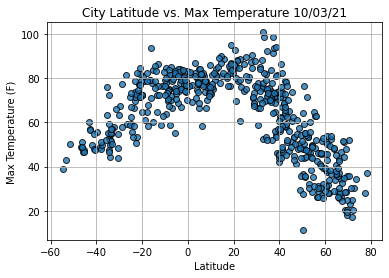

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

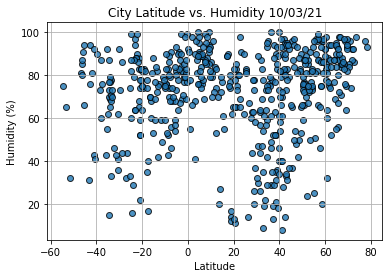

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

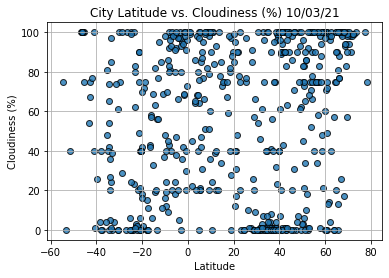

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

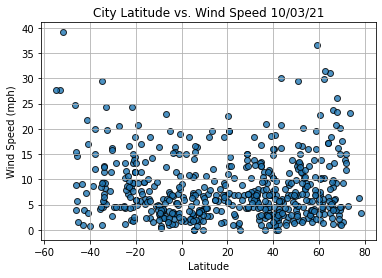

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()